<a href="https://colab.research.google.com/github/lauradela/challengesONE_t8_proj1/blob/main/AluraStoreBr_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for i, df in enumerate(lojas):
  faturamento = df['Preço'].sum()
  print(f'O valor total do faturamento da {nomes[i]} é: R$ {faturamento:.2f}')


O valor total do faturamento da Loja 1 é: R$ 1534509.12
O valor total do faturamento da Loja 2 é: R$ 1488459.06
O valor total do faturamento da Loja 3 é: R$ 1464025.03
O valor total do faturamento da Loja 4 é: R$ 1384497.58


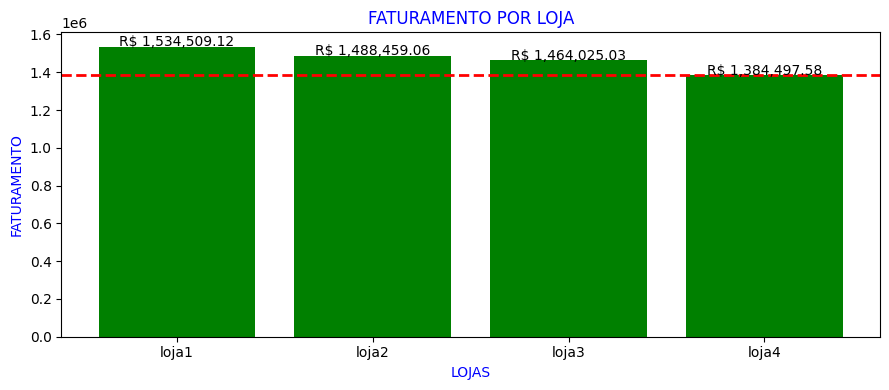

In [ ]:
import matplotlib.pyplot as plt

faturamentos = [1534509.12,1488459.06,1464025.03,1384497.58]
lojas = ['loja1','loja2','loja3','loja4']

#especificar o menor valor
menor_faturamento = min(faturamentos)

#gráfico de barra:
plt.figure(figsize=(9, 4))

plt.bar(lojas, faturamentos, color='green')

#linha tracajada de aviso:
plt.axhline(y=menor_faturamento, color='red',linestyle='--', linewidth=2, label='Menor Faturamento')

plt.title('FATURAMENTO POR LOJA',color='blue')

plt.xlabel('LOJAS',color='blue')

plt.ylabel('FATURAMENTO' ,color='blue')
#espaçamento
plt.tight_layout()

# Adicionr valores no topo das barras
for i,valor in enumerate(faturamentos):
    plt.text(i, valor + 3000, f'R$ {valor:,.2f}',ha='center')

plt.show()

# 2. Vendas por Categoria


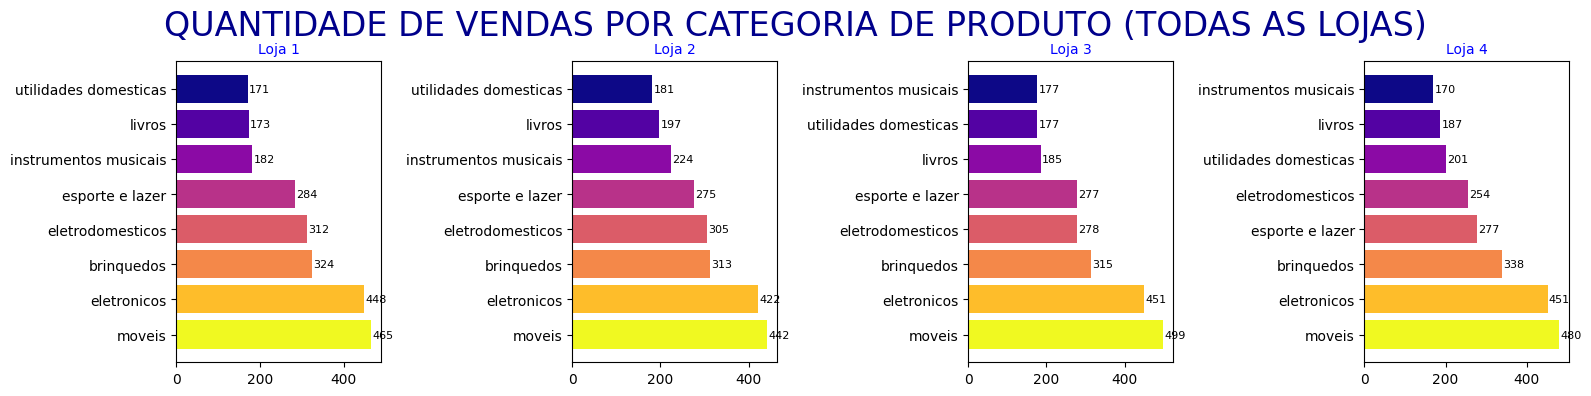

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Lista das lojas e nomes
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Criar figura com 4 subplots em uma linha
fig, axs = plt.subplots(1, 4, figsize=(16, 4))  # 1 linha, 4 colunas

for i, dados_loja in enumerate(lojas):
    # Contar vendas por categoria
    vendas = dados_loja['Categoria do Produto'].value_counts().sort_values(ascending=True)

    # Preparar os dados
    vendas_df = vendas.reset_index()
    vendas_df.columns = ['Categoria', 'Quantidade']
    cores = plt.cm.plasma(np.linspace(0, 1, len(vendas_df)))

    # Gráfico horizontal
    axs[i].barh(vendas_df['Categoria'], vendas_df['Quantidade'], color=cores)
    axs[i].invert_yaxis()
    axs[i].set_title(f'{nomes_lojas[i]}', color='blue', fontsize=10)

    # Adicionar quantidade no final de cada barra
    for j, qtd in enumerate(vendas_df['Quantidade']):
        axs[i].text(qtd + 3, j, str(qtd), va='center', fontsize=8)

plt.suptitle('QUANTIDADE DE VENDAS POR CATEGORIA DE PRODUTO (TODAS AS LOJAS)', fontsize=24, color='darkblue')
plt.tight_layout()
plt.subplots_adjust(top=0.85, )  # Para dar espaço ao título geral
#não consegui colocar o texto dentro do gráfico
plt.show()


In [ ]:
pip install squarify

# 3. Média de Avaliação das Lojas

Média de avaliações da Loja 1: 3.98
Média de avaliações da Loja 2: 4.04
Média de avaliações da Loja 3: 4.05
Média de avaliações da Loja 4: 4.00


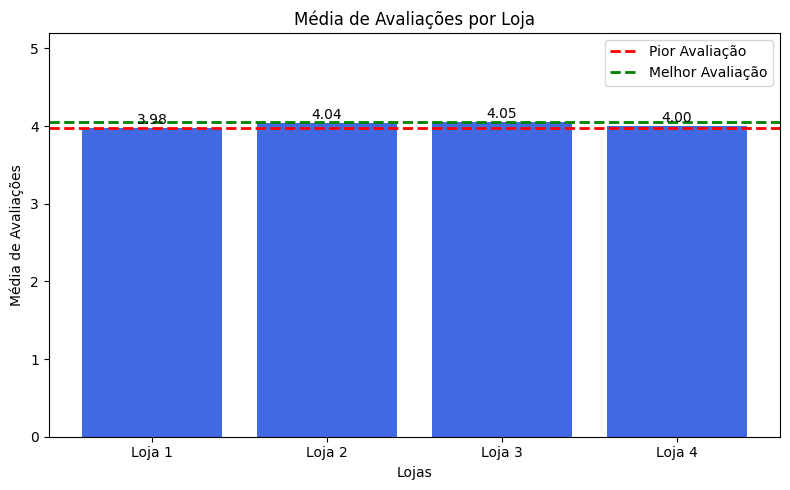

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Listas com DataFrames e nomes
lojas_df = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Calcular médias de avaliação com list comprehension
avaliacoes = [df['Avaliação da compra'].mean() for df in lojas_df]

# Exibir no console
for nome, media in zip(nomes_lojas, avaliacoes):
    print(f"Média de avaliações da {nome}: {media:.2f}")

# Identificar melhor e pior avaliação
pior = min(avaliacoes)
melhor = max(avaliacoes)

# Criar gráfico
plt.figure(figsize=(8, 5))
plt.bar(nomes_lojas, avaliacoes, color='royalblue')

# Adicionar linhas de referência
plt.axhline(y=pior, color='red', linestyle='--', linewidth=2, label='Pior Avaliação')
plt.axhline(y=melhor, color='green', linestyle='--', linewidth=2, label='Melhor Avaliação')

# Adicionar valores nas barras
for i, valor in enumerate(avaliacoes):
    plt.text(i, valor + 0.05, f'{valor:.2f}', ha='center')

# Personalizar gráfico
plt.title('Média de Avaliações por Loja')
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliações')
plt.ylim(0, 5.2)
plt.legend()
plt.tight_layout()
plt.show()



# 4. Produtos Mais e Menos Vendidos

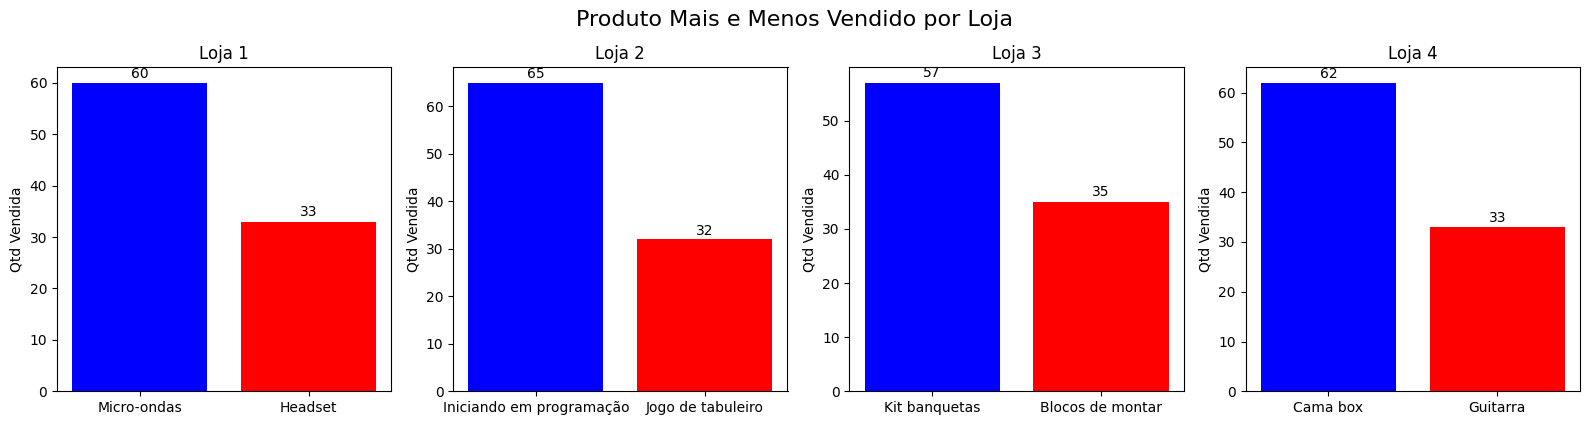

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregar os dados
loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# 2. Lista com os DataFrames e nomes
lojas = [loja1, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# 3. Criar gráfico para cada loja
plt.figure(figsize=(16, 4))  # Linha horizontal de gráficos

for i, loja in enumerate(lojas):
    contagem = loja['Produto'].value_counts()

    if len(contagem) >= 2:  # Verifica se tem pelo menos 2 produtos
        produto_mais = contagem.idxmax()
        qtd_mais = contagem.max()

        produto_menos = contagem.idxmin()
        qtd_menos = contagem.min()

        produtos = [produto_mais, produto_menos]
        quantidades = [qtd_mais, qtd_menos]
        cores = ['blue', 'red']

        # Gráfico de barras
        plt.subplot(1, 4, i+1)
        plt.bar(produtos, quantidades, color=cores)
        plt.title(nomes_lojas[i])
        plt.ylabel('Qtd Vendida')
        for j, valor in enumerate(quantidades):
            plt.text(j, valor + 1, str(valor), ha='center')
    else:
        print(f'{nomes_lojas[i]} não tem produtos suficientes para comparar.')

plt.tight_layout()
plt.suptitle('Produto Mais e Menos Vendido por Loja', fontsize=16, y=1.05)
plt.show()


# 5. Frete Médio por Loja


In [ ]:
frete_loja1 = loja['Frete'].sum()
frete_loja2 = loja2['Frete'].sum()
frete_loja3 = loja3['Frete'].sum()
frete_loja4 = loja4['Frete'].sum()

print(f'O valor total de gasto com frete da loja 1 é:R$ {frete_loja1:.2f}')
print(f'valor total de gasto com frete loja 2 é:R$ {frete_loja2:.2f}')
print(f'valor total de gasto com frete loja 3 é:R${frete_loja3:.2f}')
print(f'valor total de gasto com frete loja 4 é:R${frete_loja4:.2f}')

O valor total de gasto com frete da loja 1 é:R$ 73755.88
valor total de gasto com frete loja 2 é:R$ 79314.16
valor total de gasto com frete loja 3 é:R$78022.66
valor total de gasto com frete loja 4 é:R$73755.88


In [ ]:
frete_loja1 = loja['Frete'].mean()
frete_loja2 = loja2['Frete'].mean()
frete_loja3 = loja3['Frete'].mean()
frete_loja4 = loja4['Frete'].mean()

print(f'O valor medio de gasto com frete da loja 1 é:R$ {frete_loja1:.2f}')
print(f'valor medio de gasto com frete loja 2 é:R$ {frete_loja2:.2f}')
print(f'valonrmedio de gasto com frete loja 3 é:R${frete_loja3:.2f}')
print(f'valor medio de gasto com frete loja 4 é:R${frete_loja4:.2f}')

O valor medio de gasto com frete da loja 1 é:R$ 31.28
valor medio de gasto com frete loja 2 é:R$ 33.62
valonrmedio de gasto com frete loja 3 é:R$33.07
valor medio de gasto com frete loja 4 é:R$31.28


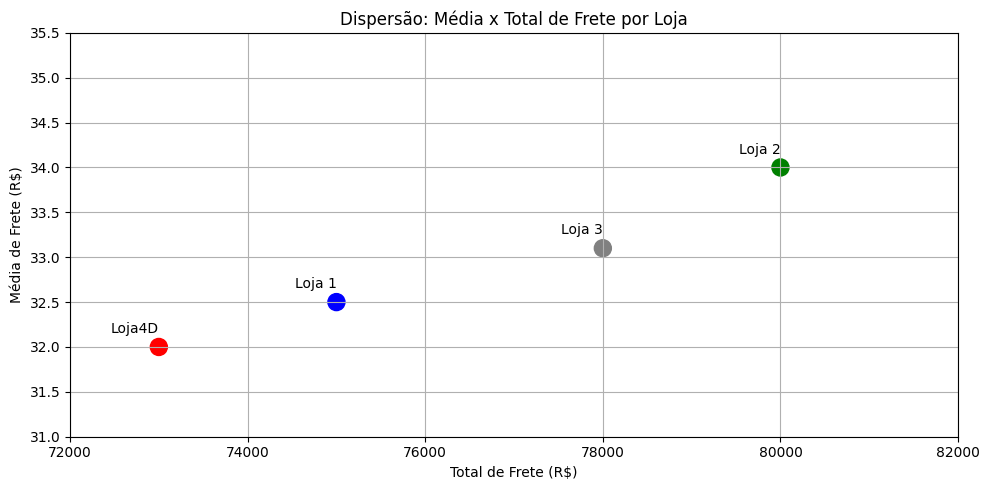

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import squarify

# 1. Carregar os dados
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"


loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

df_frete = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja4D'],
    'Total Frete': [75000, 80000, 78000, 73000],
    'Média Frete': [32.5, 34.0, 33.1, 32.0]
})

plt.figure(figsize=(10,5))

cores = ['blue', 'green', 'grey', 'red']
plt.scatter(df_frete['Total Frete'], df_frete['Média Frete'], color=cores, s=150)

# Adiciona os nomes das lojas próximos aos pontos
for i, row in df_frete.iterrows():
    plt.text(row['Total Frete'],
             row['Média Frete'] + 0.2,
             row['Loja'],
             fontsize=10,
             ha='right',
             va='center')

    # Configurações do gráfico
plt.xlabel('Total de Frete (R$)')
plt.ylabel('Média de Frete (R$)')
plt.title('Dispersão: Média x Total de Frete por Loja')
plt.grid(True)
plt.ylim(31, 35.5)
plt.xlim(72000, 82000)
plt.tight_layout()
plt.show()

**Relatório de Análise de Desempenho de Lojas**

Este relatório tem como objetivo final, orientar o Sr.João, proprietário de quatro lojas da Alura Store, a se desfazer de uma delas com a finalidade de investir em um novo ramo de negócio.

**Aspectos considerados:**

Faturamento total de cada loja

Categorias mais populares

Média das avaliações dos clientes

Produtos mais e menos vendidos

Custo médio do frete

Baseado em análises distintas de cada loja, segue relatório ilustrado com os devidos gráficos a fim de um melhor entendimento.

**FATURAMENTO DAS LOJAS** (Faturamento individual)

Loja 1:  R$1534509.12

Loja 2:  R$1488459.06

Loja 3:  R$1464025.03

Loja 4:  R$1384497.58


Sendo a LOJA 4, aquela que apresentou o menor volume de vendas como mostra a ilustração.


**CATEGORIAS MAIS POPULARES**

**Móveis e Eletrônicos** : analisando o resultado das 4 lojas nota-se a  semelhança na preferência dos produtos escolhidos pelo consumidor.

**MÉDIA DAS AVALIAÇÕES DOS CLIENTES**

Na análise de  satisfação dos clientes a **Loja 1** veio na frente como pior avaliação , seguida pela  **Loja 4**.

**PRODUTOS MAIS E MENOS VENDIDOS**

Na análise dos produtos mais vendidos o **jogo Iniciando em programação** saiu na frente com **65** vendas na **Loja2**.
O produto de menor saída foi o **jogo de tabuleiro** **com 32** vendas também na **Loja2**.

**CUSTO MÉDIO DO FRETE**

O estudo sobre o custo médio de fretes e o valor total destes, apresentou o maior custo total e o maior  valor de frete médio na **Loja1**, o quê significa um alto volume de pedidos. Enquanto a  **Loja 4** apresentou o menor frete total e o menor frete médio

**CONCLUSÃO**
Avaliando as métricas do faturamento total, das categorias mais populares, das média das avaliações dos clientes, e o custo  médio com frete, fica concluído que a loja indicada a ser desfeita pelo SR.João é a **Loja 4** que apresentou o menor faturamento e uma avaliação muito  baixa por parte dos clientes.







